all plots of interest for fitting models of 1-4 layers to data of a 3 layer model.

for each above has no limit on max thickness\


In [1]:
import os.path
import numpy as np
import matplotlib.pyplot as plt
import scipy
import refnx
from refnx.dataset import ReflectDataset, Data1D
from refnx.analysis import Transform, CurveFitter, Objective, Model, Parameter
from refnx.reflect import SLD, Slab, ReflectModel
from refnx._lib import flatten
from refnx._lib import unique as f_unique
from sepObjectiveDiffPriors import getObjective as gO
from sepObjectiveDiffPriors import variable
# from dynesty import DynamicNestedSampler
# from dynesty import plotting as dyplot
import ultranest
from ultranest.plot import cornerplot
# from DynestyInterface import CFitter
import make_sim_data as msd
print('refnx: %s\nscipy: %s\nnumpy: %s' % (refnx.version.version,
                   scipy.version.version, np.version.version));


refnx: 0.1.16
scipy: 1.5.0
numpy: 1.18.5
refnx: 0.1.16
scipy: 1.5.0
numpy: 1.18.5


In [2]:
# def prior_transfom(unitVolume, function):
    

In [3]:
maxLength = 350
def logp_extra(model, data=None):
    returns = 0
    if sum(model.structure.slabs()[1:-1,0])>maxLength:
        returns = -np.inf
    return returns

In [4]:
figI = 0
# simple structure
thicks_true = [10,120,100,130,10]
bs_true = [0,5,4.5,5,10]
roughs_true = [0,0,0,0,0]
# bs = [5,4.5,5]
# thicks = [120,100,130]
# roughs = [0,0,0]
bs = bs_true
thicks = thicks_true
roughs = roughs_true
loss = 1.
no_layers = len(bs)
# no_layers = len(bs_true)
# no_layers = 3
layers1 = []
layers2 = []
names = []
#names = ['layer1','layer2']
contrast_layer = 1
bs_contrast_layer = 6
thicks_contrast_layer=Parameter(thicks[contrast_layer],
                                "layer1 thickness")
roughs_contrast_layer=Parameter(roughs[contrast_layer],
                                "layer0/contrast roughness")
for i in range(no_layers):
    names.append('layer'+str(i))
for i in range(no_layers):
    if i != contrast_layer:
        sld = SLD(bs[i],name=names[i])
        sld = sld(thicks[i],roughs[i])
        layers1.append(sld)
        layers2.append(sld)
    else:
        sld1 = SLD(bs[i],name=names[i]+" contrast a")
        sld1 = sld1(thicks_contrast_layer,roughs_contrast_layer)
        sld2 = SLD(bs_contrast_layer,name=names[i]+" contrast b")
        sld2 = sld2(thicks_contrast_layer,roughs_contrast_layer)
        layers1.append(sld1)
        layers2.append(sld2)

structure1 = layers1[0]
for layer in layers1[1:]:
    structure1|=layer

structure2 = layers2[0]
for layer in layers2[1:]:
    structure2|=layer
print("done")

done


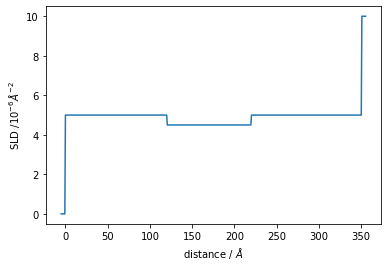

In [5]:
%matplotlib inline
# plt.rcParams['figure.figsize'] = [9.5, 6]
plt.figure(figI)
figI+=1
plt.plot(*structure1.sld_profile())
plt.ylabel('SLD /$10^{-6} \AA^{-2}$')
plt.xlabel('distance / $\AA$');

# plt.figure(figI)
# figI+=1
# plt.plot(*structure2.sld_profile())
# plt.ylabel('SLD /$10^{-6} \AA^{-2}$')
# plt.xlabel('distance / $\AA$');
# print("done")

In [6]:
resolution = 5.
model1 = ReflectModel(structure1, bkg=3e-6, dq=resolution)
model2 = ReflectModel(structure2, bkg=3e-6, dq=resolution)

csv
cvs-collecting
out  [2.01464799e+02 7.28262110e+01 8.04847837e+03 8.78133049e-19
 1.65301989e-05] 
var:  [[2.37035370e+01 1.32256391e+02 5.92624404e-01 7.01383237e+04
  8.07503239e-05]
 [1.32256391e+02 7.38288156e+02 3.30638742e+00 4.13426355e+05
  4.52656248e-04]
 [5.92624404e-01 3.30638742e+00 1.48166520e-02 1.73947331e+03
  2.01753978e-06]
 [7.01383237e+04 4.13426355e+05 1.73947331e+03 1.60220079e+09
  3.71650935e-01]
 [8.07503239e-05 4.52656248e-04 2.01753978e-06 3.71650935e-01
  2.92283331e-10]]


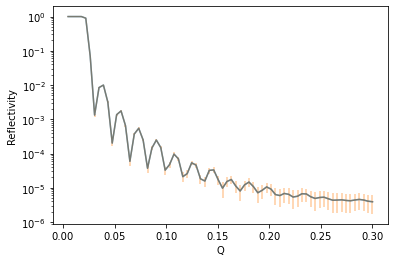

In [7]:
q = np.linspace(0.005, 0.3, 70)# was 1001 no 70
plt.figure(figI)
figI+=1
R1 = model1(q, x_err=resolution)
plt.plot(q, R1)
plt.xlabel('Q')
plt.ylabel('Reflectivity')
plt.yscale('log')
sim_dR1 = msd.main(sim_q=q,sim_R=R1)*10
plt.errorbar(q,R1,sim_dR1, alpha=0.4);

# q = np.linspace(0.005, 0.3, 70)# was 1001 no 70
# plt.figure(figI)
# figI+=1
# R2 = model2(q, x_err=resolution)
# plt.plot(q, R2)
# plt.xlabel('Q')
# plt.ylabel('Reflectivity')
# plt.yscale('log')
# sim_dR2 = msd.main(sim_q=q,sim_R=R2)*10
# plt.errorbar(q,R2,sim_dR2, alpha=0.4)

In [8]:
data = Data1D(data= (q,R1,sim_dR1))#,Data1D(data= (q,R2,sim_dR2))]

In [9]:
# percentRange_s=[1,2.5,5,10,15]
percentRanges=[1,5,7.5,10,15]

## 1 layered

Creating directory for new run ultraNestpriours\sizeVariation\layer1\run1
[ultranest] PointStore: have 0 items
[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=7e+01  68.1291..68.1292]*| it/evals=3222/4502 eff=78.5471% N=400 
[ultranest] Likelihood function evaluations: 4504
[ultranest] Writing samples and results to disk ...
[ultranest] Writing samples and results to disk ... done
[ultranest]   logZ = 64.72 +- 0.04306
[ultranest] Effective samples strategy satisfied (ESS = 1806.0, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.45+-0.05 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.15, need <0.5)
[ultranest]   logZ error budget: single: 0.07 bs:0.04 tail:0.01 total:0.04 required:<0.50
[ultranest] done iterating.

logZ = 64.697 +- 0.151
  single instance: logZ = 64.697 +- 0.072
  bootstrapped   : logZ = 64.725 +- 0.151
  tail           : logZ = +- 0.010

    layer1 - thick      350.21 +- 0.41
    layer1 - sld        4.779 +- 0.017
Creating directory for new run ultraNestpriours\sizeVariation\layer1\run2
[ultranest] PointStore: have 0 items
[ultranest

[ultranest] Explored until L=7e+01  71.7251..71.7251]*| it/evals=3920/5469 eff=77.3328% N=400 00   
[ultranest] Likelihood function evaluations: 5472
[ultranest] Writing samples and results to disk ...
[ultranest] Writing samples and results to disk ... done
[ultranest]   logZ = 66.51 +- 0.06276
[ultranest] Effective samples strategy satisfied (ESS = 1531.8, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.45+-0.06 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.14, need <0.5)
[ultranest]   logZ error budget: single: 0.10 bs:0.06 tail:0.01 total:0.06 required:<0.50
[ultranest] done iterating.

logZ = 66.526 +- 0.106
  single instance: logZ = 66.526 +- 0.104
  bootstrapped   : logZ = 66.507 +- 0.106
  tail           : logZ = +- 0.010

    layer1 - thick      350.95 +- 0.45
    layer1 - sld        4.928 +- 0.042
Creating directory for new run ultraNestpriours\sizeVariation\layer1\run3
[ultranest] PointStore: have 0 items
[ultr

[ultranest] Explored until L=7e+01  71.7203..71.7204]*| it/evals=4011/5636 eff=76.6043% N=400 00    
[ultranest] Likelihood function evaluations: 5636
[ultranest] Writing samples and results to disk ...
[ultranest] Writing samples and results to disk ... done
[ultranest]   logZ = 66.3 +- 0.09019
[ultranest] Effective samples strategy satisfied (ESS = 1566.7, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.45+-0.07 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.17, need <0.5)
[ultranest]   logZ error budget: single: 0.11 bs:0.09 tail:0.01 total:0.09 required:<0.50
[ultranest] done iterating.

logZ = 66.301 +- 0.152
  single instance: logZ = 66.301 +- 0.106
  bootstrapped   : logZ = 66.304 +- 0.152
  tail           : logZ = +- 0.010

    layer1 - thick      351.12 +- 0.51
    layer1 - sld        4.964 +- 0.061
Creating directory for new run ultraNestpriours\sizeVariation\layer1\run4
[ultranest] PointStore: have 0 items
[ultr

[ultranest] Explored until L=7e+01  71.7190..71.7191]*| it/evals=4284/5930 eff=77.4684% N=400 0     
[ultranest] Likelihood function evaluations: 5930
[ultranest] Writing samples and results to disk ...
[ultranest] Writing samples and results to disk ... done
[ultranest]   logZ = 65.62 +- 0.07687
[ultranest] Effective samples strategy satisfied (ESS = 1602.6, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.45+-0.07 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.17, need <0.5)
[ultranest]   logZ error budget: single: 0.11 bs:0.08 tail:0.01 total:0.08 required:<0.50
[ultranest] done iterating.

logZ = 65.619 +- 0.175
  single instance: logZ = 65.619 +- 0.113
  bootstrapped   : logZ = 65.621 +- 0.175
  tail           : logZ = +- 0.010

    layer1 - thick      351.14 +- 0.50
    layer1 - sld        4.969 +- 0.064
Creating directory for new run ultraNestpriours\sizeVariation\layer1\run5
[ultranest] PointStore: have 0 items
[ult

[ultranest] Explored until L=7e+01  71.7215..71.7215]*| it/evals=4437/6151 eff=77.1518% N=400 0     
[ultranest] Likelihood function evaluations: 6154
[ultranest] Writing samples and results to disk ...
[ultranest] Writing samples and results to disk ... done
[ultranest]   logZ = 65.24 +- 0.08284
[ultranest] Effective samples strategy satisfied (ESS = 1596.3, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.45+-0.10 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.16, need <0.5)
[ultranest]   logZ error budget: single: 0.12 bs:0.08 tail:0.01 total:0.08 required:<0.50
[ultranest] done iterating.

logZ = 65.232 +- 0.148
  single instance: logZ = 65.232 +- 0.117
  bootstrapped   : logZ = 65.235 +- 0.148
  tail           : logZ = +- 0.010

    layer1 - thick      351.13 +- 0.50
    layer1 - sld        4.969 +- 0.064
Wall time: 11min 24s


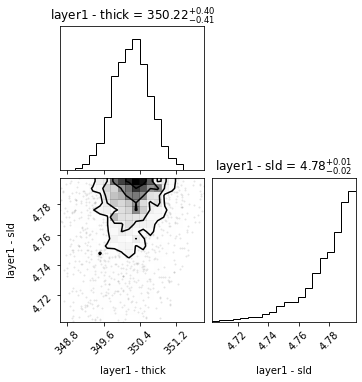

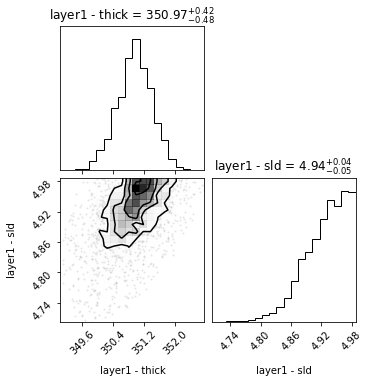

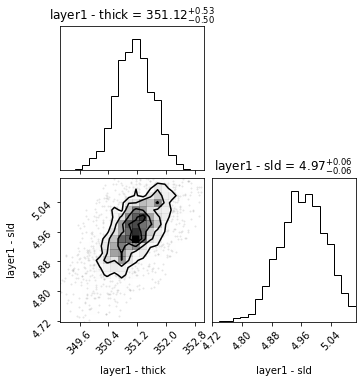

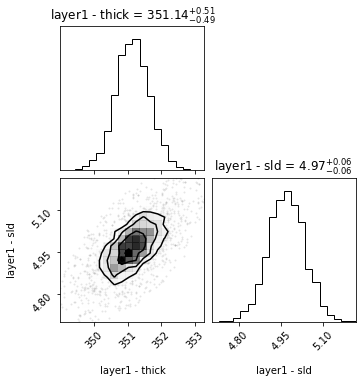

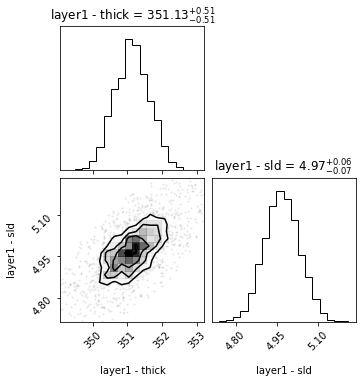

In [10]:
%%time

objective1, structure11 = gO(data, 1, both=True, globalObjective=False) # was 06:09 now 0:36
# fitter = CFitter(objective1)
nDimensions = len(list(
                p for p in f_unique(flatten(objective1.parameters))
                if p.vary ))
DNSampler = DynamicNestedSampler(objective1.logl, objective1.prior_transform, nDimensions)
DNSampler.run_nested(dlogz_init=0.5) # was 0.01
res11 = DNSampler.results

labels1 = [param.name for param in objective1.varying_parameters()]

fig, axes = dyplot.traceplot(res11, labels = labels1, #truths=np.zeros(fitter.nDim()),
                             show_titles=True, trace_cmap='plasma',
                             quantiles=[0.025, 0.5, 0.975])
fig.tight_layout()

fig, axes = dyplot.cornerplot(res11, labels = labels1,#, #truths=np.zeros(fitter.nDim()),
                             show_titles=True
                             #trace_cmap='plasma',
                             #quantiles=[0.025, 0.5, 0.975]
                               )
fig.tight_layout()


fig, axes = dyplot.cornerpoints(res11, labels = labels1#, #truths=np.zeros(fitter.nDim()),
#                              show_titles=True
                             #trace_cmap='plasma',
                             #quantiles=[0.025, 0.5, 0.975]
                               )
fig.tight_layout()




for i in percentRanges:
    startPointT = 350.
    startPointSld = (5.+4.5)/2
    thicknesses = [variable(startPointT, startPointT-startPointT*i/100, startPointT+startPointT*i/100)]
    slds = [variable(startPointSld, startPointSld-startPointSld*i/100, startPointSld+startPointSld*i/100)]
    objective1, structure11 = gO(data, thicknesses, slds, layerNames=["layer1"]) # was 06:09 now 0:36
    # fitter = CFitter(objective1)
    parameter_names1 = list( p.name for p in objective1.varying_parameters() )
    UNSampler1 = ultranest.ReactiveNestedSampler(parameter_names1, objective1.logl, objective1.prior_transform,
                log_dir="ultraNestpriours\sizeVariation\layer1", resume="subfolder")
    result1 = UNSampler1.run() # was 0.01
    UNSampler1.print_results()
    UNSampler1.plot()
    UNSampler1.plot_trace()
    cornerplot(result1)
#     fig = plt.figure(figI)
#     fig1, ax = objective1.plot(fig=fig)
#     figI+=1
#     plt.figure(figI)
#     figI+=1
#     plt.plot(*structure11.sld_profile())
#     plt.ylabel('SLD /$10^{-6} \AA^{-2}$')
#     plt.xlabel('distance / $\AA$');

In [11]:

# plt.figure(figI)
# figI+=1
# plt.plot(*structure12.sld_profile())
# plt.ylabel('SLD /$10^{-6} \AA^{-2}$')
# plt.xlabel('distance / $\AA$');

# fig, ax = objective2.plot()
# figI+=1
# plt.figure(figI)
# figI+=1
# plt.plot(*structure21.sld_profile())
# plt.ylabel('SLD /$10^{-6} \AA^{-2}$')
# plt.xlabel('distance / $\AA$');
# plt.figure(figI)
# figI+=1
# plt.plot(*structure22.sld_profile())
# plt.ylabel('SLD /$10^{-6} \AA^{-2}$')
# plt.xlabel('distance / $\AA$');

## 2 layered

Creating directory for new run ultraNestpriours\sizeVariation\layer2\run1
[ultranest] PointStore: have 0 items
[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=7e+01  69.2013..69.2022]*| it/evals=3227/7686 eff=44.2904% N=400 
[ultranest] Likelihood function evaluations: 7686
[ultranest] Writing samples and results to disk ...
[ultranest] Writing samples and results to disk ... done
[ultranest]   logZ = 65.81 +- 0.03984
[ultranest] Effective samples strategy satisfied (ESS = 1896.6, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.08 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.10, need <0.5)
[ultranest]   logZ error budget: single: 0.07 bs:0.04 tail:0.01 total:0.04 required:<0.50
[ultranest] done iterating.

logZ = 65.799 +- 0.096
  single instance: logZ = 65.799 +- 0.068
  bootstrapped   : logZ = 65.813 +- 0.096
  tail           : logZ = +- 0.010

    layer1 - thick      175.06 +- 0.94
    layer1 - sld        4.744 +- 0.023
    layer2 - thick      174.97 +- 0.94
    layer2 - sld        4.782 +- 0.014
Creating directory for new run ultraNestpri

[ultranest] Explored until L=8e+01  78.2971..78.2974]*| it/evals=5120/13488 eff=39.1198% N=400   
[ultranest] Likelihood function evaluations: 13491
[ultranest] Writing samples and results to disk ...
[ultranest] Writing samples and results to disk ... done
[ultranest]   logZ = 70.22 +- 0.08341
[ultranest] Effective samples strategy satisfied (ESS = 2259.4, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.04 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.17, need <0.5)
[ultranest]   logZ error budget: single: 0.12 bs:0.08 tail:0.01 total:0.08 required:<0.50
[ultranest] done iterating.

logZ = 70.205 +- 0.171
  single instance: logZ = 70.205 +- 0.120
  bootstrapped   : logZ = 70.218 +- 0.171
  tail           : logZ = +- 0.010

    layer1 - thick      178.5 +- 4.4
    layer1 - sld        4.857 +- 0.037
    layer2 - thick      172.0 +- 4.5
    layer2 - sld        4.960 +- 0.025
Creating directory for new run ultraNestpri

[ultranest] Explored until L=8e+01  81.9602..81.9605]*| it/evals=5677/15158 eff=38.4673% N=400     
[ultranest] Likelihood function evaluations: 15163
[ultranest] Writing samples and results to disk ...
[ultranest] Writing samples and results to disk ... done
[ultranest]   logZ = 72.5 +- 0.08207
[ultranest] Effective samples strategy satisfied (ESS = 2539.2, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.08 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.20, need <0.5)
[ultranest]   logZ error budget: single: 0.13 bs:0.08 tail:0.01 total:0.08 required:<0.50
[ultranest] done iterating.

logZ = 72.473 +- 0.197
  single instance: logZ = 72.473 +- 0.132
  bootstrapped   : logZ = 72.501 +- 0.197
  tail           : logZ = +- 0.010

    layer1 - thick      183.5 +- 5.0
    layer1 - sld        4.922 +- 0.042
    layer2 - thick      167.3 +- 5.1
    layer2 - sld        5.063 +- 0.036
Creating directory for new run ultraNestpr

[ultranest] Explored until L=8e+01  84.0249..84.0249]*| it/evals=5840/15135 eff=39.6335% N=400      
[ultranest] Likelihood function evaluations: 15137
[ultranest] Writing samples and results to disk ...
[ultranest] Writing samples and results to disk ... done
[ultranest]   logZ = 74.09 +- 0.06717
[ultranest] Effective samples strategy satisfied (ESS = 2456.6, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.07 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.14, need <0.5)
[ultranest]   logZ error budget: single: 0.14 bs:0.07 tail:0.01 total:0.07 required:<0.50
[ultranest] done iterating.

logZ = 74.096 +- 0.130
  single instance: logZ = 74.096 +- 0.138
  bootstrapped   : logZ = 74.092 +- 0.129
  tail           : logZ = +- 0.010

    layer1 - thick      188.6 +- 4.6
    layer1 - sld        4.968 +- 0.052
    layer2 - thick      162.3 +- 4.6
    layer2 - sld        5.145 +- 0.056
Creating directory for new run ultraNest

[ultranest] Explored until L=9e+01  85.7145..85.7145]*| it/evals=6206/16399 eff=38.7899% N=400      
[ultranest] Likelihood function evaluations: 16399
[ultranest] Writing samples and results to disk ...
[ultranest] Writing samples and results to disk ... done
[ultranest]   logZ = 74.89 +- 0.1176
[ultranest] Effective samples strategy satisfied (ESS = 2186.9, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.07 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.29, need <0.5)
[ultranest]   logZ error budget: single: 0.15 bs:0.12 tail:0.01 total:0.12 required:<0.50
[ultranest] done iterating.

logZ = 74.862 +- 0.292
  single instance: logZ = 74.862 +- 0.149
  bootstrapped   : logZ = 74.892 +- 0.292
  tail           : logZ = +- 0.010

    layer1 - thick      197.0 +- 4.0
    layer1 - sld        4.998 +- 0.069
    layer2 - thick      154.0 +- 4.1
    layer2 - sld        5.207 +- 0.083
Wall time: 26min 7s


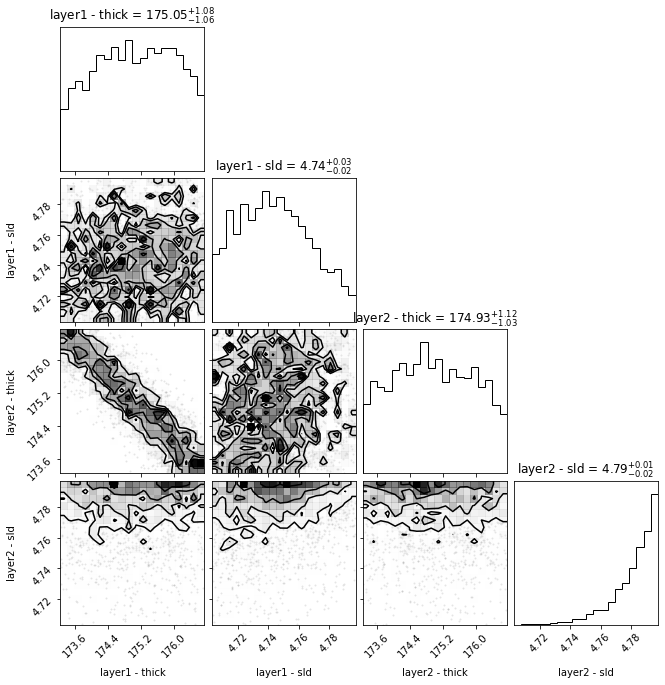

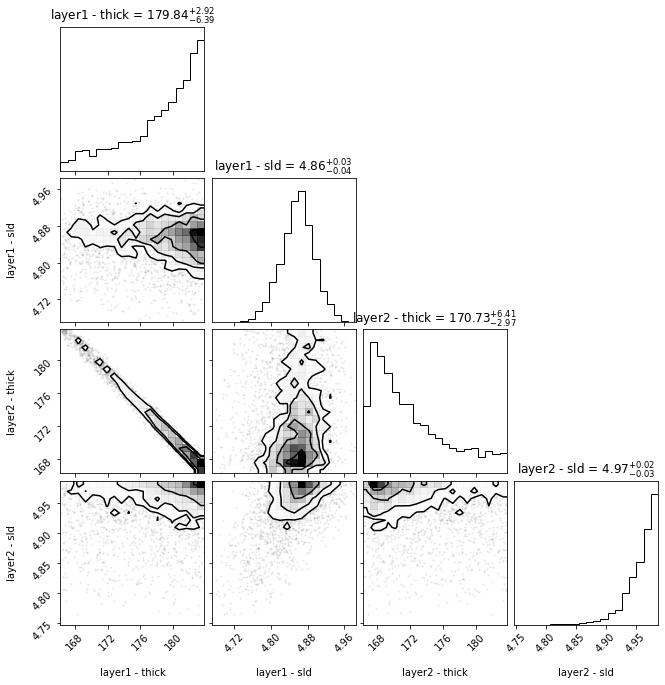

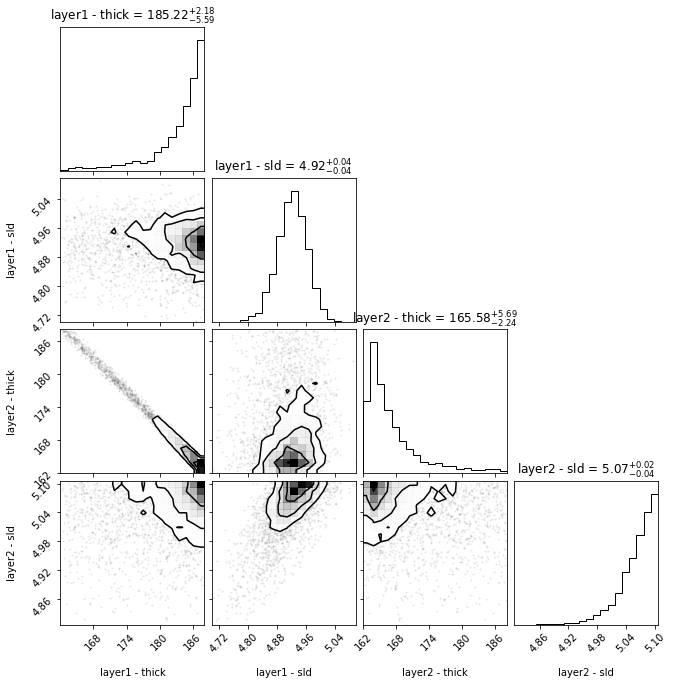

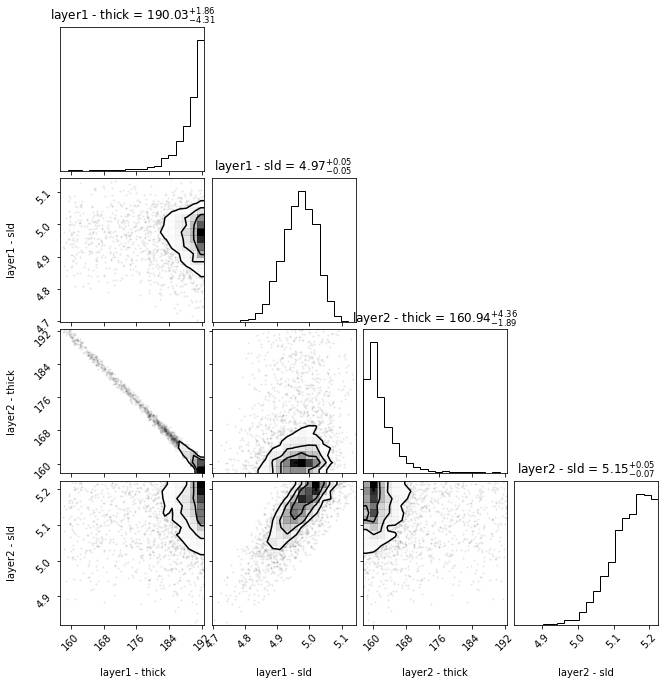

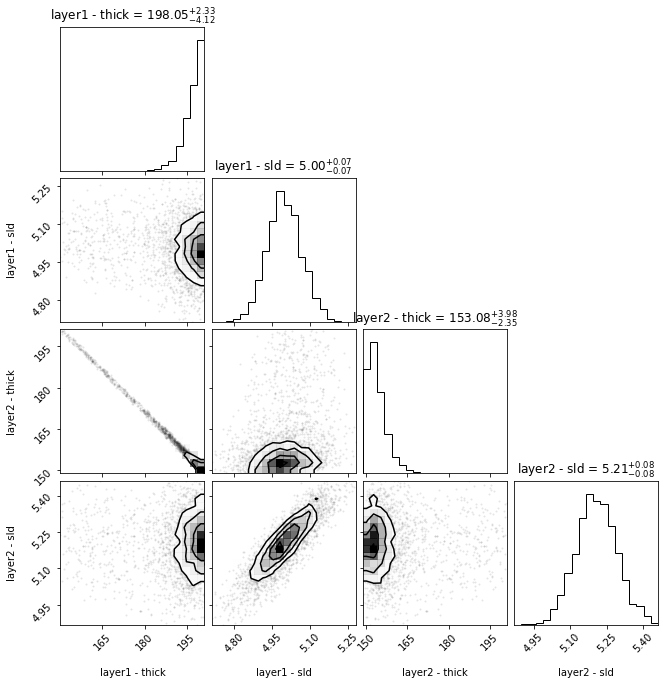

In [12]:
%%time
for i in percentRanges:
    startPointT = 350./2
    startPointSld = (5.+4.5)/2
    thicknesses = [variable(startPointT, startPointT-startPointT*i/100, startPointT+startPointT*i/100),
                  variable(startPointT, startPointT-startPointT*i/100, startPointT+startPointT*i/100)]
    slds = [variable(startPointSld, startPointSld-startPointSld*i/100, startPointSld+startPointSld*i/100),
           variable(startPointSld, startPointSld-startPointSld*i/100, startPointSld+startPointSld*i/100)]
    objective2, structure21 = gO(data, thicknesses, slds, layerNames=["layer1", "layer2"]) # was 06:09 now 0:36
    # fitter = CFitter(objective1)
    parameter_names2 = list( p.name for p in objective2.varying_parameters() )
    UNSampler2 = ultranest.ReactiveNestedSampler(parameter_names2, objective2.logl, objective2.prior_transform,
                log_dir="ultraNestpriours\sizeVariation\layer2", resume="subfolder")
    result2 = UNSampler2.run() # was 0.01
    UNSampler2.print_results()
    UNSampler2.plot()
    UNSampler2.plot_trace()
    cornerplot(result2)

## 3 layered

In [13]:
%%time
for i in percentRanges:
    startPointT = 350./3
    startPointSld = (5.+4.5)/2
    thicknesses = [variable(startPointT, startPointT-startPointT*i/100, startPointT+startPointT*i/100),
                  variable(startPointT, startPointT-startPointT*i/100, startPointT+startPointT*i/100),
                  variable(startPointT, startPointT-startPointT*i/100, startPointT+startPointT*i/100)]
    slds = [variable(startPointSld, startPointSld-startPointSld*i/100, startPointSld+startPointSld*i/100),
           variable(startPointSld, startPointSld-startPointSld*i/100, startPointSld+startPointSld*i/100),
           variable(startPointSld, startPointSld-startPointSld*i/100, startPointSld+startPointSld*i/100)]
    objective3, structure31 = gO(data, thicknesses, slds, layerNames=["layer1","layer2","layer3"]) # was 06:09 now 0:36
    # fitter = CFitter(objective1)
    parameter_names3 = list( p.name for p in objective3.varying_parameters() )
    UNSampler3 = ultranest.ReactiveNestedSampler(parameter_names3, objective3.logl, objective3.prior_transform,
                log_dir="ultraNestpriours\sizeVariation\layer3", resume="subfolder")
    result3 = UNSampler3.run() # was 0.01
    UNSampler3.print_results()
    UNSampler3.plot()
    UNSampler3.plot_trace()
    cornerplot(result3)

NameError: name 'sldSlab' is not defined

## 4 layered

In [14]:
# %%time
# for i in percentRanges:
#     startPointT = 350./4
#     startPointSld = 5
#     thicknesses = [variable(startPointT, startPointT-startPointT*i/100, startPointT+startPointT*i/100)]
#     slds = [variable(startPointSld, startPointSld-startPointSld*i/100, startPointSld+startPointSld*i/100)]
#     objective4, structure41 = gO(data, thicknesses, slds, layerNames=["layer1","layer2","layer3","layer4"]) # was 06:09 now 0:36
#     # fitter = CFitter(objective1)
#     parameter_names4 = list( p.name for p in objective3.varying_parameters() )
#     UNSampler4 = ultranest.ReactiveNestedSampler(parameter_names4, objective4.logl, objective4.prior_transform,
#                 log_dir="ultraNestpriours\sizeVariation\layer4", resume="subfolder")
#     result4 = UNSampler4.run() # was 0.01
#     UNSampler4.print_results()
#     UNSampler4.plot()
#     UNSampler4.plot_trace()
#     cornerplot(result4)